# Pymaceuticals - Matplotlib Challenge

## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [3]:
study_results.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"], how = "left")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
count = len(mouse_df["Mouse ID"].unique())
count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = mouse_df.loc[mouse_df.duplicated(subset = ["Mouse ID","Timepoint"]),"Mouse ID"].unique()

dupe_mice

array(['g989'], dtype=object)

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df[mouse_df["Mouse ID"].isin(dupe_mice)==False]

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.
nodupes_count = len(clean_df["Mouse ID"].unique())

nodupes_count

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_dev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

stats_summary = pd.DataFrame({"Mean Vol": mean, "Median Vol": median, "Variance": variance, "StdDev": std_dev, "SEM": sem})

stats_summary

,Mean Vol,Median Vol,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen = clean_df.groupby(["Drug Regimen"])
stats_summary2 = regimen.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stats_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Charts
### Pandas

In [40]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 

# Create Dataframe
total_mice = mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

total_mice_df = pd.DataFrame({"Total Mice": total_mice}).sort_values("Total Mice", ascending=False)
total_mice_df

,Total Mice
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


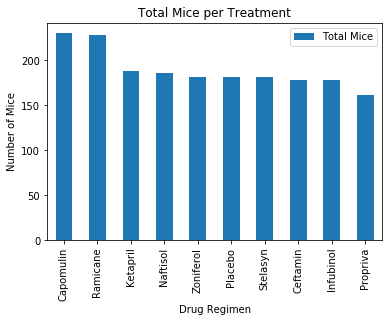

In [41]:
total_mice_df.plot(kind = "bar", title = "Total Mice per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

### Pyplot

In [49]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pyplot.
mouse_count = clean_df["Drug Regimen"].value_counts()

mouse_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

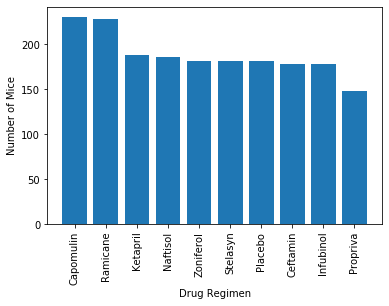

In [50]:
plt.bar(mouse_count.index.values, mouse_count.values, align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

## Pie Charts
### Pyplot

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
mice_sex = clean_df["Sex"].value_counts()

mice_sex

Male      958
Female    922
Name: Sex, dtype: int64

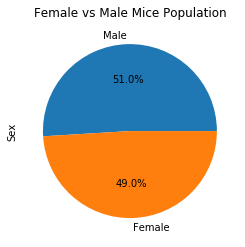

In [59]:
plt.pie(mice_sex, labels = ["Male", "Female"], autopct="%1.1f%%")
plt.title("Female vs Male Mice Population")
plt.ylabel("Sex")

plt.show()

### Pandas

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_df = clean_df.groupby(["Mouse ID", "Sex"])
sex_df = pd.DataFrame(group_df.size())

sex_count = pd.DataFrame(sex_df.groupby(["Sex"]).count())
sex_count.columns = ["Count"]

sex_count

,Count
Sex,
Female,123
Male,125


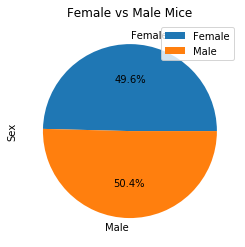

In [73]:
sex_count.plot(kind="pie", y = "Count", label = "Sex", autopct="%1.1f%%", title = "Female vs Male Mice")


## Quartiles, Outliers and Boxplots

In [74]:
# * Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#     Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine 
#     if there are any potential outliers across all four treatment regimens.

# * Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their color and style.

#   **Hint**: All four box plots should be within the same figure. 
#         Use this [Matplotlib documentation page]
#         (https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capo_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Rami_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
Inful_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
Cefta_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]
# bestRX_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
#                          (clean_df["Drug Regimen"] == "Ramicane") |
#                          (clean_df["Drug Regimen"] == "Infubinol") |
#                          (clean_df["Drug Regimen"] == "Ceftamin")]

bestRX_df
# columns_to_extract = ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)""]
# last_tp_df = pd.DataFrame(bestRX_df, columns = columns_to_extract)

# last_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [79]:
# Start by getting the last (greatest) timepoint for each mouse

maxRX = bestRX_df.groupby(["Mouse ID", "Timepoint"]).max()

maxRX_df = pd.DataFrame(maxRX).reset_index()

maxRX_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.000000,0
1,a203,5,Infubinol,Female,20,23,48.508468,0
2,a203,10,Infubinol,Female,20,23,51.852437,1
3,a203,15,Infubinol,Female,20,23,52.777870,1
4,a203,20,Infubinol,Female,20,23,55.173336,1


In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxRX_merge = pd.merge(maxRX_df, mouse_df, on = ["Mouse ID", "Drug Regimen", "Timepoint"], how = "left")

maxRX_merge

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = maxRX_merge["Drug Regimen"].unique()
drugs
# Create empty list to fill with tumor vol data (for plotting)
volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [103]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin")]
capo_mouse_df = capo_df.loc[capo_df["Mouse ID"] == "s185"]
capo_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


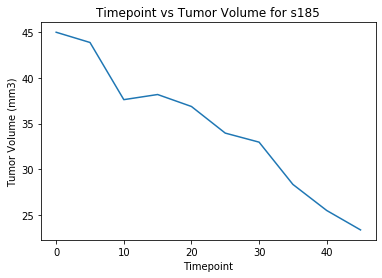

In [104]:
# Create Plot
x_axis = capo_mouse_df["Timepoint"]
y_axis = capo_mouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Timepoint vs Tumor Volume for s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

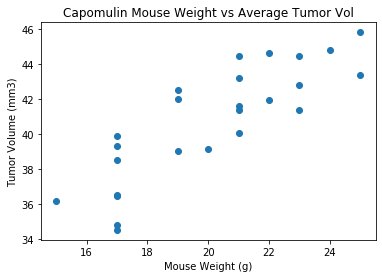

In [105]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 
capo_ave_df = capo_df.groupby(["Mouse ID"]).mean()

plt.scatter(capo_ave_df["Weight (g)"], capo_ave_df["Tumor Volume (mm3)"])
plt.title("Capomulin Mouse Weight vs Average Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

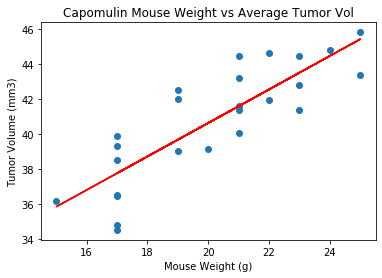

The correlation coefficient for mouse weight and tumor volume is: 0.8419363424694718


In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(capo_ave_df["Weight (g)"], capo_ave_df["Tumor Volume (mm3)"])
plt.title("Capomulin Mouse Weight vs Average Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(capo_ave_df["Weight (g)"], capo_ave_df["Tumor Volume (mm3)"])
regress_value = capo_ave_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(capo_ave_df["Weight (g)"], regress_value, "r-")

plt.show()
print(f"The correlation coefficient for mouse weight and tumor volume is: {rvalue}")